## Tinder Data Model

#### The given data set is the excel data sheet made from the Tinder website .In the given data set we needs to check the factors effects for making realtionship.Also needs to check the unwanted data's which doesn't depends on model prediction.




#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Fetching Data

### Basic EDA functions

In [2]:
df = pd.read_csv('Tinder.csv')
df.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


In [3]:
df.tail()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
1891,1891,292887.5496,web,"Meridian, Idaho",No,0.000000,0.000000,0
1892,1892,292881.6932,mobile,"Meridian, Idaho",No,1203.190399,0.312360,0
1893,1893,292900.8499,gender,"Meridian, Idaho",No,806.378820,0.488025,0
1894,1894,292893.8600,gender,"Meridian, Idaho",No,1149.529381,0.488984,0
1895,1895,292890.2944,web,"Meridian, Idaho",No,0.000000,0.000000,0


#### Dropping Unwanted Columns

In [4]:
df.drop(['Unnamed: 0','ID','Segment Description'], axis=1,inplace = True)

#### Rechecking the current shape of the data set after froppingb unwanted columns

In [5]:
df.shape

(1896, 5)

In [6]:
df.head()

,Segment type,Answer,Count,Percentage,It became a relationship
0,web,No,0.000000,0.000000,0
1,web,No,0.000000,0.000000,0
2,gender,No,499.173606,0.225255,0
3,web,No,0.000000,0.000000,0
4,gender,No,455.925963,0.211360,0


#### Checking the co-relation between the each columns 

In [7]:
df.corr()

,Count,Percentage,It became a relationship
Count,1.000000,0.412200,0.186139
Percentage,0.412200,1.000000,0.311429
It became a relationship,0.186139,0.311429,1.000000


In [8]:
df.describe()

,Count,Percentage,It became a relationship
count,1896.000000,1896.000000,1896.000000
mean,446.881267,0.254098,0.350738
std,494.110578,0.220809,0.477327
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,400.439633,0.257873,0.000000
75%,845.560798,0.396787,1.000000
max,1969.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Segment type                0
Answer                      0
Count                       0
Percentage                  0
It became a relationship    0
dtype: int64

In [10]:
df.columns

Index(['Segment type', 'Answer', 'Count', 'Percentage',
       'It became a relationship'],
      dtype='object')

#### Checking Unknown Values

In [11]:
df.nunique()

Segment type                   4
Answer                         3
Count                       1125
Percentage                  1172
It became a relationship       2
dtype: int64

df = pd.get_dummies(df,drop_first=True)

### labelling the Column values instead of Making dummies

In [12]:
from sklearn.preprocessing import LabelEncoder
cols = ['Segment type','Answer']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [13]:
df.head()

,Segment type,Answer,Count,Percentage,It became a relationship
0,3,1,0.000000,0.000000,0
1,3,1,0.000000,0.000000,0
2,0,1,499.173606,0.225255,0
3,3,1,0.000000,0.000000,0
4,0,1,455.925963,0.211360,0


#### With the help of seaborn, graphical representation and co-relation of the each columns in the data set is shown.

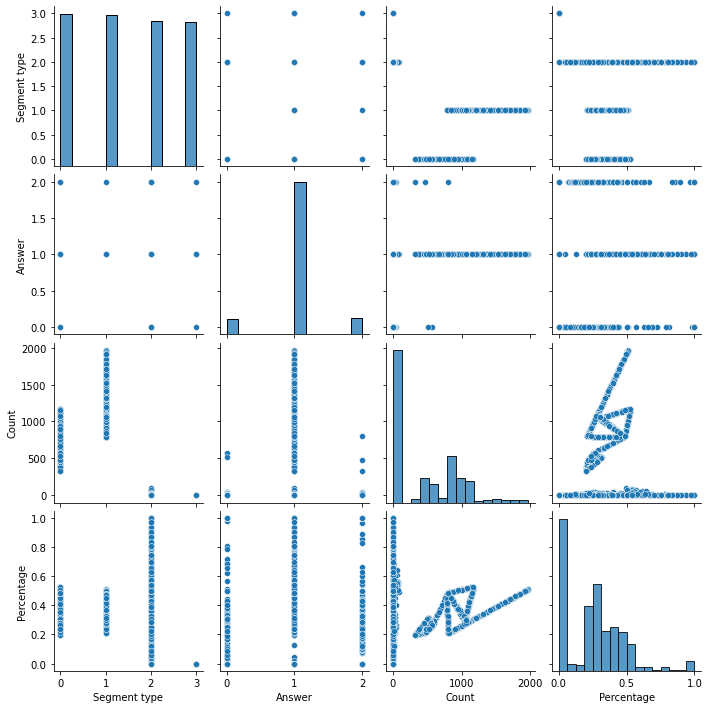

In [14]:
import seaborn as sns
sns.pairplot(df.iloc[:,:-1])

## K-Means Clustering

### Here in the Data output is depends on various columns so here using K means clustering

In [15]:
x = df.loc[:,['Segment type','Answer','Count','Percentage']].values
y = df.loc[:,['It became a relationship']].values

In [18]:
x

array([[3.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 4.99173606e+02, 2.25254764e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00, 8.06378820e+02, 4.88025418e-01],
       [0.00000000e+00, 1.00000000e+00, 1.14952938e+03, 4.88984275e-01],
       [3.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [20]:
X

array([[ 1.36503178, -0.00382176, -0.9046541 , -1.15106581],
       [ 1.36503178, -0.00382176, -0.9046541 , -1.15106581],
       [-1.31786413, -0.00382176,  0.10585917, -0.13066077],
       ...,
       [-1.31786413, -0.00382176,  0.72775693,  1.05969141],
       [-1.31786413, -0.00382176,  1.42242145,  1.06403503],
       [ 1.36503178, -0.00382176, -0.9046541 , -1.15106581]])

In [21]:
y = y.reshape(-1)

In [22]:
y.shape

(1896,)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state = 0, test_size = 0.25)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

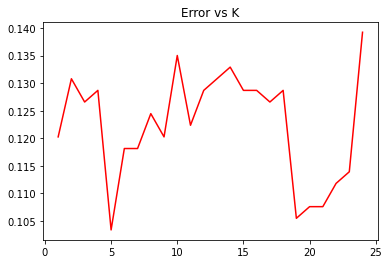

In [27]:
plt.plot(list(range(1,25)),err_list,c = 'r')
plt.title('Error vs K')
plt.show()

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

### Accuracy of the model fo the predcited data's 

In [29]:
accuracy_score(Y_test,Y_pred)

0.8966244725738397

In [30]:
confusion_matrix(Y_test,Y_pred)

array([[282,  22],
       [ 27, 143]], dtype=int64)